## Artificial vortex array flow test

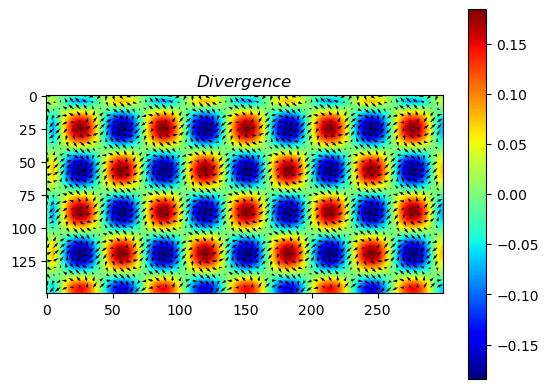

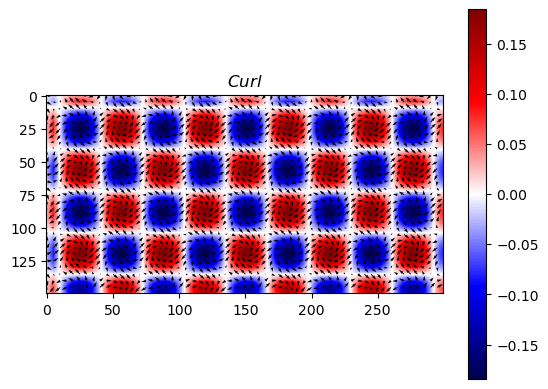

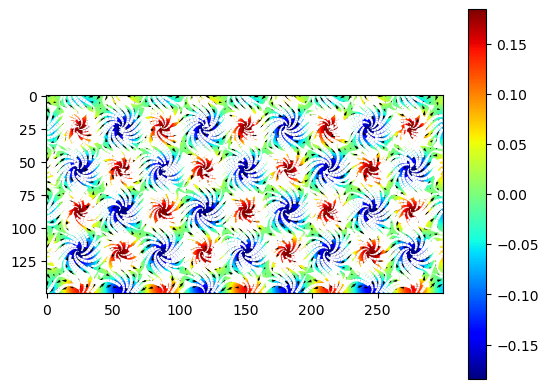

In [1]:
# %% OPTION 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

def divergence_npgrad(flow):
    # flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx = np.gradient(Fx, axis=0)
    dFy_dy = np.gradient(Fy, axis=1)
    return dFx_dx + dFy_dy

def curl_npgrad(flow):
    # flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dy = np.gradient(Fx, axis=1)
    dFy_dx = np.gradient(Fy, axis=0)
    curl = dFy_dx - dFx_dy
    return curl

def smooth_field(f, filter_size=11):
    filter_size = 11
    filt = np.outer(np.exp(np.linspace(-1, 1, filter_size)), np.exp(np.linspace(-1, 1, filter_size)))
    filt = filt / filt.sum()
    return convolve2d(f, filt, mode='same')

y, x = np.mgrid[0:150, 0:300]
u = np.cos((x + y)/10) #* np.random.rand(*x.shape)
v = np.sin((x - y)/10) #* np.random.rand(*x.shape)
field = np.stack((u, v), axis=-1)
divergence = smooth_field(divergence_npgrad(field), filter_size=10)
vorticity = smooth_field(curl_npgrad(field), filter_size=10)

plt.figure()
step = 5
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], field[::step, ::step, 1])
plt.imshow(divergence, cmap="jet")
plt.title("$Divergence$")
plt.colorbar()

plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], field[::step, ::step, 1])
plt.imshow(vorticity, cmap="seismic")
plt.title("$Curl$")
plt.colorbar()

#  Varying line width along a streamline
speed = np.sqrt(u**2 + v**2)
lw = 3*speed / speed.max()
step = 5
plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], field[::step, ::step, 1], color="k")#, scale=30
plt.streamplot(x, y, field[..., 0], -field[..., 1], density=3., color='white', linewidth=lw)
plt.imshow(divergence, cmap="jet")
plt.colorbar()

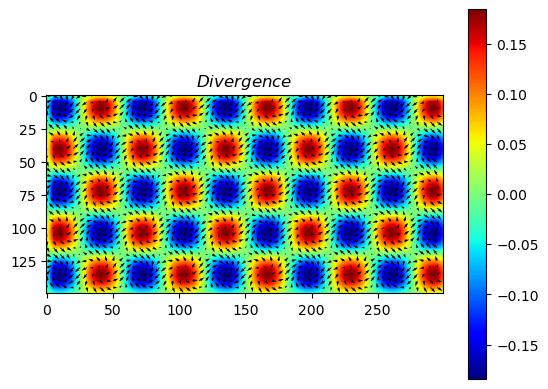

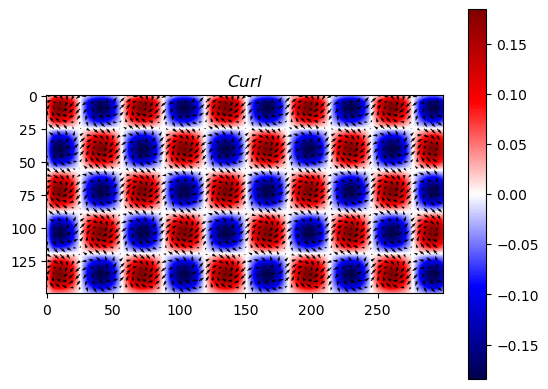

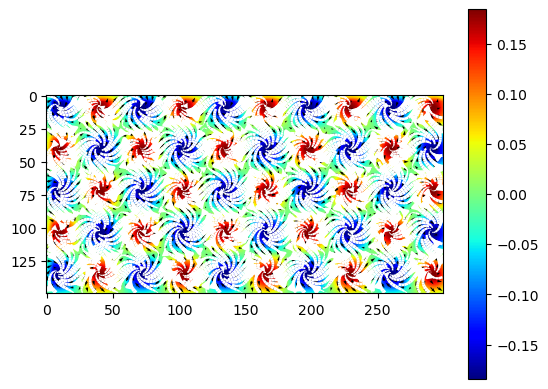

In [2]:
# %% OPTION 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

def divergence_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx = np.gradient(Fx, axis=0)
    dFy_dy = np.gradient(Fy, axis=1)
    return dFx_dx + dFy_dy

def curl_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dy = np.gradient(Fx, axis=1)
    dFy_dx = np.gradient(Fy, axis=0)
    curl = dFy_dx - dFx_dy
    return curl

def smooth_field(f, filter_size=11):
    filter_size = 11
    filt = np.outer(np.exp(np.linspace(-1, 1, filter_size)), np.exp(np.linspace(-1, 1, filter_size)))
    filt = filt / filt.sum()
    return convolve2d(f, filt, mode='same')

y, x = np.mgrid[0:150, 0:300]
u = np.cos((x + y)/10) #* np.random.rand(*x.shape)
v = np.sin((x - y)/10) #* np.random.rand(*x.shape)
field = np.stack((u, v), axis=-1)
divergence = smooth_field(divergence_npgrad(field), filter_size=10)
vorticity = smooth_field(curl_npgrad(field), filter_size=10)

plt.figure()
step = 5
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
plt.imshow(divergence.T, cmap="jet")
plt.title("$Divergence$")
plt.colorbar()

plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
plt.imshow(vorticity.T, cmap="seismic")
plt.title("$Curl$")
plt.colorbar()

#  Varying line width along a streamline
speed = np.sqrt(u**2 + v**2)
lw = 3*speed / speed.max()
step = 5
plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1], color="k")#, scale=30
plt.streamplot(x, y, field[..., 0], field[..., 1], density=3., color='white', linewidth=lw)
plt.imshow(divergence.T, cmap="jet")
plt.colorbar()

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


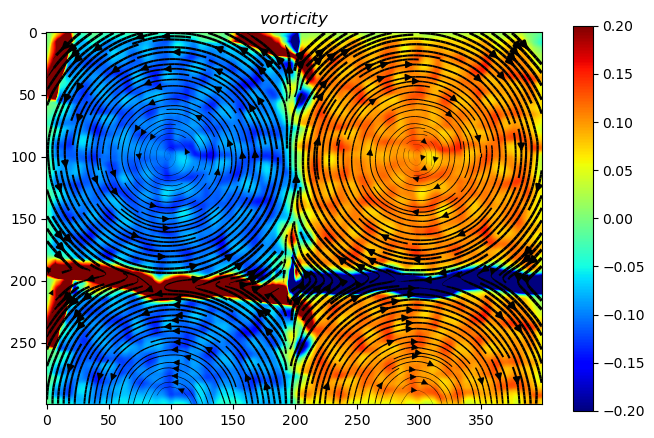

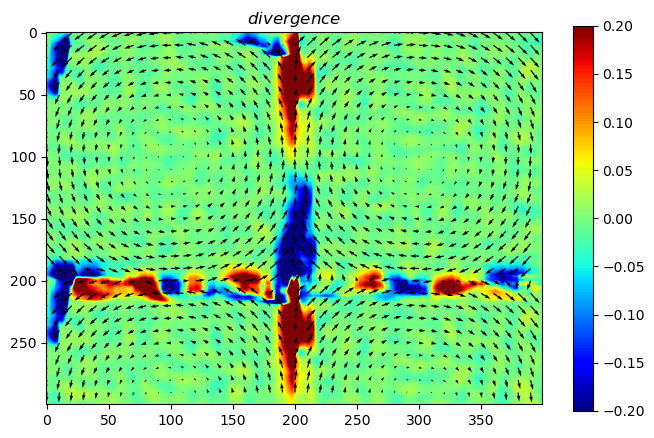

In [10]:
# %%
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import io
%matplotlib inline

def divergence_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx = np.gradient(Fx, axis=0)
    dFy_dy = np.gradient(Fy, axis=1)
    return dFx_dx + dFy_dy

def curl_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dy = np.gradient(Fx, axis=1)
    dFy_dx = np.gradient(Fy, axis=0)
    curl = dFy_dx - dFx_dy
    return curl

def smooth_field(f, filter_size=11):
    filter_size = 15
    filt = np.outer(np.exp(np.linspace(-1, 1, filter_size)), np.exp(np.linspace(-1, 1, filter_size)))
    filt = filt / filt.sum()
    return convolve2d(f, filt, mode='same')

# Load the images
im = io.imread("../_bacteria/hbec_images/rotations-1.tif")[:,:-100, :]
im_num = 0
im1 = im[im_num]
im2 = im[im_num+1]

# Calculate the optical flow using Lucas-Kanade method
flow = cv2.calcOpticalFlowFarneback(im1,im2, None, 0.5, 3, 
        winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)  
u, v = flow[:,:,0], flow[:,:,1]
y, x = np.mgrid[0:im1.shape[0], 0:im1.shape[1]]
field = np.stack((u, v), axis=-1)
divergence = smooth_field(divergence_npgrad(field), filter_size=50)
vorticity = smooth_field(curl_npgrad(field), filter_size=3)

plt.figure(figsize=(8,5))
step = 10
speed = np.sqrt(u**2 + v**2)
lw = 3*speed / speed.max()
# plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
plt.streamplot(x, y, field[..., 0], field[..., 1], density=3., color='k', linewidth=lw)
plt.imshow(vorticity.T, cmap="jet", vmin=-.2, vmax=.2)
plt.title("$vorticity$")
plt.colorbar()

plt.figure(figsize=(8,5))
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
# plt.streamplot(x, y, field[..., 0], field[..., 1], density=3., color='k', linewidth=lw)
plt.imshow(divergence.T, cmap="jet", vmin=-.2, vmax=.2)
plt.title("$divergence$")
plt.colorbar()